# K-means Algorithm

## Steps

1. **Data Generation**
   - Generate or collect the data that will be used for clustering.

2. **Data Analysis**
   - Explore and preprocess the data to ensure it is suitable for the algorithm. This may include normalization, handling missing values, etc.

3. **Centroid Calculation**
   - Randomly initialize k centroids (where k is the number of clusters).

4. **Cluster Formation**
   - Assign each data point to the nearest centroid, forming k clusters.

5. **Iterate Step 3 and Step 4 Till Convergence**
   - Recalculate the centroids as the mean of all data points assigned to each cluster.
   - Reassign data points to the nearest centroid. Repeat these steps until the centroids no longer change significantly or a predetermined number of iterations is reached.

In [39]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [40]:
# generate randoem data for clustering
data = np.random.uniform(0,100,(100,2))
data.shape, data[:5]

((100, 2),
 array([[36.37644889, 57.38207294],
        [69.48469333, 98.77965613],
        [32.32230856, 95.7429563 ],
        [54.57300674, 28.87782027],
        [22.2778177 , 47.98019795]]))

In [41]:
# tranform data for visualizaiton
x_data = data[:,0]
y_data = data[:,1]
x_data.shape, y_data.shape

((100,), (100,))

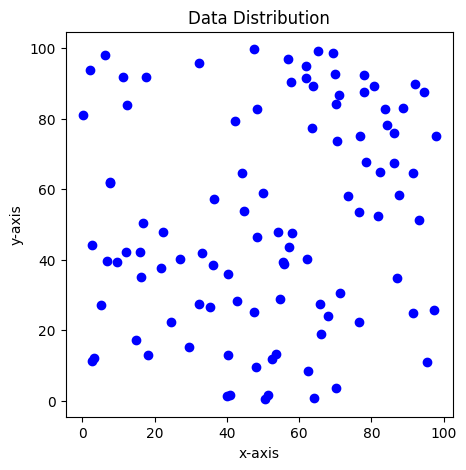

In [42]:
# plot data for visualization

plot = plt.figure(figsize=(5,5))
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Data Distribution")
plt.scatter(x_data,y_data,c='blue')


labels:  [1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0]
centroids:  [[63.37253751 80.7466435 ]
 [41.98602073 28.85208737]]


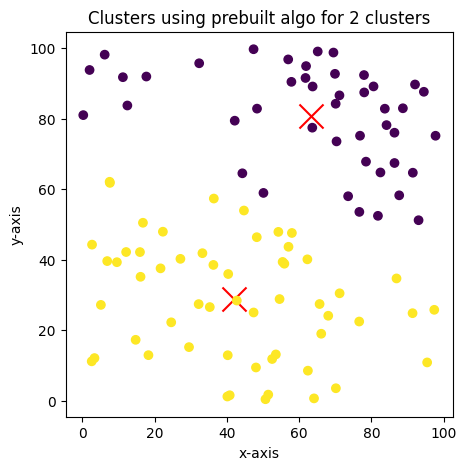

In [208]:
# Let's use prebuilt library first
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
cluster = kmeans.fit(data)
print("labels: ",cluster.labels_)
print("centroids: ",cluster.cluster_centers_)


plot = plt.figure(figsize=(5,5))
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Clusters using prebuilt algo for 2 clusters")
plt.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,1], c='red', marker='x', s=300)
plt.scatter(x_data,y_data,c=cluster.labels_)


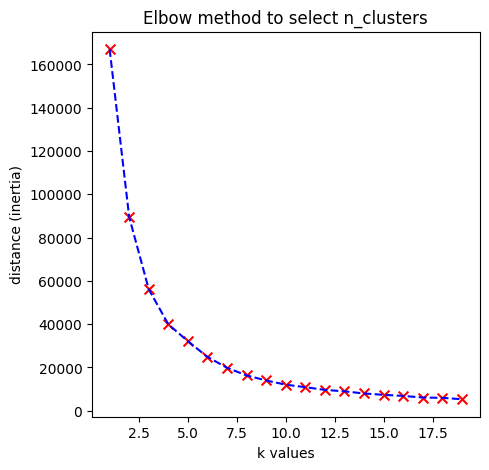

In [209]:
# find optimal number of clusters using elbow method

candidates = [x for x in range(1,20)]
distances = []

for c in candidates:
    kmean = KMeans(n_clusters = c)
    kmean.fit(data)
    distances.append(kmean.inertia_)
    
fig = plt.figure(figsize=(5,5))
plt.title('Elbow method to select n_clusters')
plt.xlabel('k values')
plt.ylabel('distance (inertia)')
plt.plot(candidates, distances, c='blue', linestyle='--')
plt.scatter(candidates, distances, marker='x', c='red', s=50)


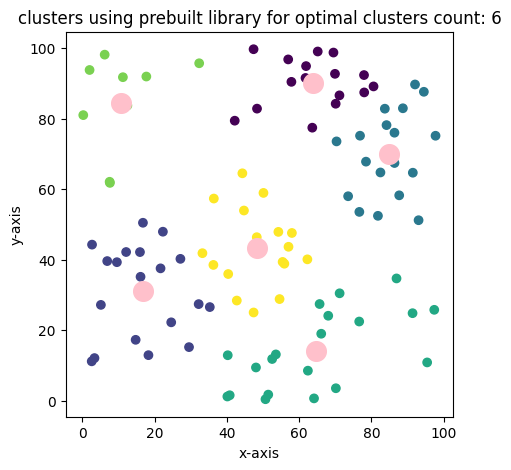

In [211]:
# from above graph 6 seems to be the optimal choice because from that point graph flattens
kmean = KMeans(n_clusters=6)
kmean.fit(data)
labels = kmean.labels_
centroids = kmean.cluster_centers_

fig = plt.figure(figsize=(5,5))
plt.title(f"clusters using prebuilt library for optimal clusters count: {n_clusters}")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.scatter(data[:,0],data[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1], marker='o', c='pink',s=200)

In [225]:
#Let's implement KMeans now
n_clusters = 6

# choose 6 points randomly as cluster centroid
rand_ind = np.random.choice(data.shape[0],n_clusters,replace=False)
centroids = data[rand_ind]
print("random centroid indices: ",rand_ind)
print("initial centroids: ",centroids)


random centroid indices:  [21 51  8 31 24 30]
initial centroids:  [[32.18094044 27.44984404]
 [71.19201571 30.51617381]
 [91.37864775 24.87576093]
 [92.06226542 89.72963778]
 [27.12894801 40.28355574]
 [54.23950441 47.9299799 ]]


In [226]:
# create function for cluster assignment as it will be called many times

def L2_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))


def assign_to_cluster():
    
    new_cluster = [[] for _ in range(centroids.shape[0])]
    distances = []
    for point in data:
        min_d = np.inf
        min_index = -1
        for ind, centroid in enumerate(centroids):
            dist = L2_distance(point,centroid)
            distances.append(dist)
            if dist < min_d:
                min_d = dist
                min_index = ind
        new_cluster[min_index].append(point.tolist())
        
    for ind in range(len(centroids)):
        centroids[ind] = np.mean(new_cluster[ind],axis=0)
        
    inertia = np.sum(distances)
    return new_cluster, centroids, inertia


        

In [227]:
#Iterate till convergence

max_iter = 15
diff_interia = np.inf
iter_count = 0
old_inertia = 0

while iter_count < max_iter and diff_interia > 1e-5:
    
    clusters, centroids, current_inertia = assign_to_cluster()
    
    iter_count += 1
    if diff_interia == np.inf:
        diff_interia = current_inertia
        
    else:
        diff_interia = abs(old_inertia - current_inertia)
    old_inertia = current_inertia
        
    print("Iteration Count:",iter_count, "Differnce in inertia:", diff_interia)
    
    



Iteration Count: 1 Differnce in inertia: 29430.9540499057
Iteration Count: 2 Differnce in inertia: 271.2694240613964
Iteration Count: 3 Differnce in inertia: 86.31417241643794
Iteration Count: 4 Differnce in inertia: 21.114700750673364
Iteration Count: 5 Differnce in inertia: 31.28815820267846
Iteration Count: 6 Differnce in inertia: 216.65930355897217
Iteration Count: 7 Differnce in inertia: 245.05137667151575
Iteration Count: 8 Differnce in inertia: 10.564534216733591
Iteration Count: 9 Differnce in inertia: 0.0


In [228]:
# Generate lables for each point based on formed clusters
labels = []
for point in data:
    for ind, cluster in enumerate(clusters):
        if point.tolist() in cluster:
            labels.append(ind)
            
print(labels)

[5, 3, 4, 1, 0, 2, 4, 0, 2, 1, 3, 1, 0, 3, 5, 4, 3, 1, 3, 5, 0, 0, 0, 0, 0, 2, 0, 5, 1, 4, 5, 3, 5, 4, 3, 1, 2, 3, 2, 1, 3, 5, 3, 0, 5, 3, 5, 3, 3, 0, 0, 2, 1, 0, 1, 3, 1, 1, 1, 4, 0, 5, 1, 3, 5, 0, 3, 2, 3, 3, 3, 2, 3, 4, 1, 2, 4, 5, 0, 0, 3, 2, 1, 3, 3, 3, 5, 5, 3, 4, 4, 1, 3, 5, 0, 3, 2, 2, 0, 3]


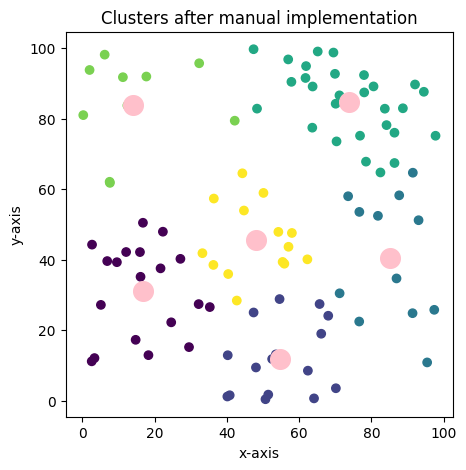

In [229]:

fig = plt.figure(figsize=(5,5))
plt.title("Clusters after manual implementation")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.scatter(data[:,0],data[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1], marker='o', s=200, c='pink')